<a href="https://colab.research.google.com/github/shahchayan9/Pycaret-low-code-tasks/blob/main/Multiclass_Classification_using_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pycaret[mlops]

In [5]:
import pycaret
pycaret.__version__

'3.3.2'

In [6]:
from pycaret.datasets import get_data
data = get_data('credit')
print(data['default'].unique())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


[1 0]


In [7]:
from pycaret.classification import *
s = setup(data, target = 'default', session_id = 123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [8]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [9]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [10]:
exp.setup(data, target = 'default', session_id = 123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.5530
lightgbm,Light Gradient Boosting Machine,0.8203,0.7768,0.3756,0.6664,0.4802,0.3816,0.4047,2.6010
ada,Ada Boost Classifier,0.8186,0.7748,0.3325,0.6850,0.4473,0.3541,0.3874,1.5200
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.1130
rf,Random Forest Classifier,0.8124,0.7645,0.3670,0.6313,0.4637,0.3596,0.3793,5.0350
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.4990
et,Extra Trees Classifier,0.8089,0.7516,0.3667,0.6142,0.4590,0.3518,0.3692,2.4440
lr,Logistic Regression,0.8069,0.7134,0.2302,0.6888,0.3449,0.2635,0.3184,2.1190
ridge,Ridge Classifier,0.8014,0.7226,0.1621,0.7296,0.2650,0.2008,0.2782,0.0640
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0440


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [12]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.6280
lightgbm,Light Gradient Boosting Machine,0.8203,0.7768,0.3756,0.6664,0.4802,0.3816,0.4047,2.9960
ada,Ada Boost Classifier,0.8186,0.7748,0.3325,0.6850,0.4473,0.3541,0.3874,1.4670
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.1680
rf,Random Forest Classifier,0.8124,0.7645,0.3670,0.6313,0.4637,0.3596,0.3793,4.9570
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.4700
et,Extra Trees Classifier,0.8089,0.7516,0.3667,0.6142,0.4590,0.3518,0.3692,2.2940
lr,Logistic Regression,0.8069,0.7134,0.2302,0.6888,0.3449,0.2635,0.3184,1.3110
ridge,Ridge Classifier,0.8014,0.7226,0.1621,0.7296,0.2650,0.2008,0.2782,0.0540
dummy,Dummy Classifier,0.7789,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

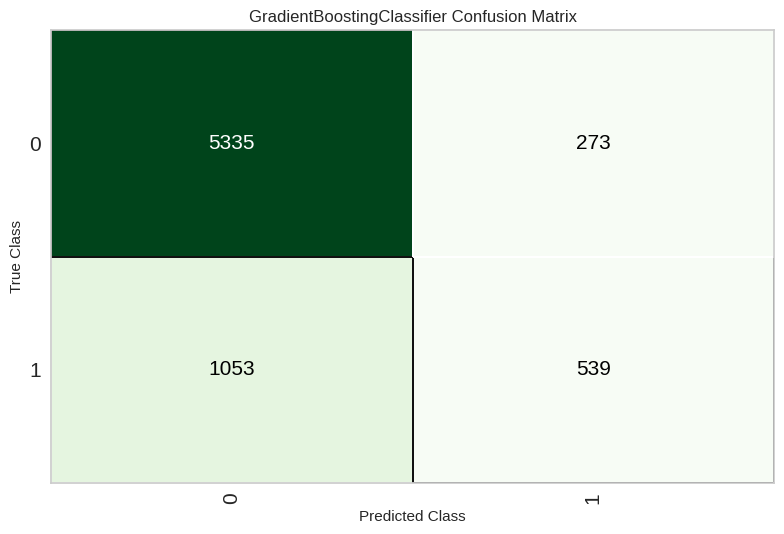

In [13]:
plot_model(best, plot = 'confusion_matrix')

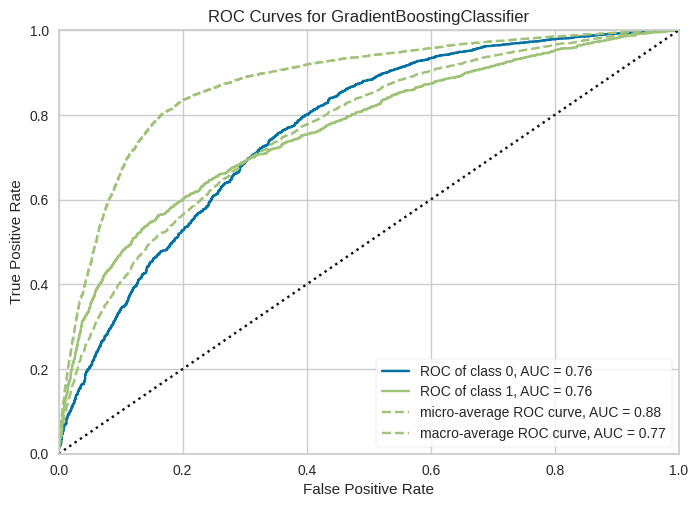

In [14]:
plot_model(best, plot = 'auc')

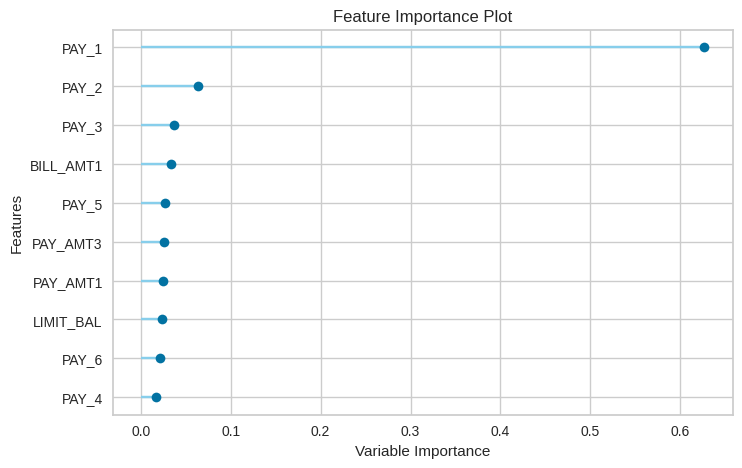

In [15]:
plot_model(best, plot = 'feature')

In [16]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8158,0.7649,0.3386,0.6638,0.4484,0.3516,0.3803


In [19]:
holdout_pred.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
21784,210000,1,1,2,33,-1,-1,-1,-1,-1,...,14800.0,10046.0,2570.0,14722.0,11220.0,14800.0,7250.0,0,0,0.9433
4076,200000,2,2,1,43,2,2,2,2,2,...,187467.0,0.0,14500.0,6400.0,7000.0,7000.0,7000.0,0,1,0.7986
4720,250000,1,2,2,30,0,0,0,0,0,...,158503.0,6523.0,7992.0,6475.0,6050.0,6197.0,6000.0,0,0,0.9040
13065,80000,2,3,1,40,-1,0,0,0,0,...,13318.0,6500.0,5000.0,4025.0,8000.0,5000.0,2000.0,0,0,0.9129
4555,50000,2,1,2,26,1,-2,-2,-2,-1,...,350.0,0.0,0.0,0.0,350.0,351.0,4076.0,0,0,0.7664


In [20]:
new_data = data.copy()
new_data.drop('default', axis=1, inplace=True)
new_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,90000,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
2,50000,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
3,50000,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
4,50000,1,1,2,37,0,0,0,0,0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0


In [21]:
predictions = predict_model(best, data = new_data)
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.6914
1,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.8757
2,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.8742
3,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.9029
4,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0.8382


In [22]:
save_model(best, 'credit_type_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, los

In [23]:
loaded_best_pipeline = load_model('credit_type_prediction_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=123, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

# Detailed function-by-function overview

## Setup

In [24]:
s = setup(data, target = 'default', session_id = 123)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


In [25]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [26]:
# lets access X_train_transformed
get_config('X_train_transformed')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
267,60000.0,2.0,1.0,2.0,28.0,1.0,2.0,0.0,0.0,0.0,...,11237.0,11427.0,20973.0,31857.0,0.0,1483.0,673.0,10000.0,11540.0,7000.0
16202,190000.0,2.0,2.0,1.0,48.0,2.0,2.0,2.0,2.0,0.0,...,94227.0,91943.0,93546.0,95759.0,4500.0,4100.0,0.0,3500.0,3600.0,3500.0
7558,120000.0,2.0,2.0,1.0,37.0,-1.0,2.0,0.0,0.0,0.0,...,42200.0,42000.0,42000.0,0.0,0.0,42000.0,200.0,0.0,0.0,0.0
20598,300000.0,2.0,2.0,1.0,46.0,1.0,-2.0,-1.0,0.0,-1.0,...,194.0,1375.0,13970.0,1672.0,0.0,194.0,1181.0,14039.0,1679.0,4156.0
2568,80000.0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,32812.0,25930.0,26414.0,27128.0,2000.0,2000.0,1100.0,1000.0,1100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18425,470000.0,2.0,2.0,2.0,33.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,0.0,779.0,0.0,0.0,0.0,0.0,779.0,0.0,0.0
12238,270000.0,2.0,2.0,1.0,44.0,0.0,0.0,-1.0,0.0,0.0,...,15896.0,32396.0,50411.0,60957.0,10203.0,15908.0,20000.0,29000.0,22000.0,1821.0
2799,230000.0,1.0,2.0,2.0,30.0,0.0,0.0,2.0,0.0,0.0,...,44652.0,48540.0,52477.0,56506.0,8000.0,0.0,4970.0,4907.0,4936.0,5024.0
22262,110000.0,2.0,2.0,1.0,25.0,2.0,0.0,0.0,0.0,0.0,...,27630.0,22017.0,20517.0,18534.0,1494.0,1402.0,1534.0,800.0,700.0,616.0


In [27]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [28]:
# init setup with normalize = True

s = setup(data, target = 'default', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


<Axes: >

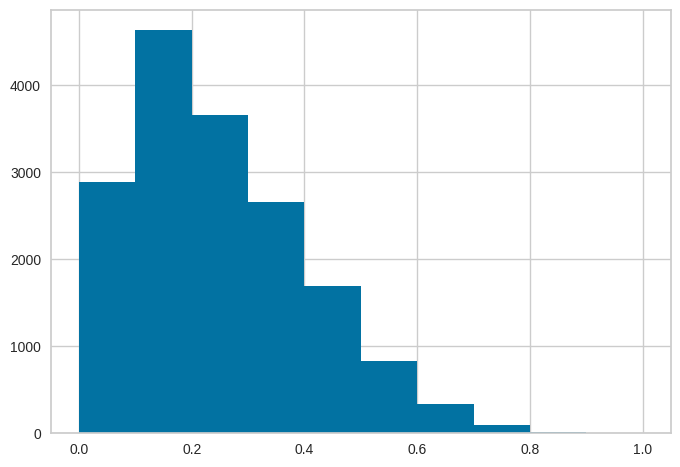

In [29]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['AGE'].hist()

<Axes: >

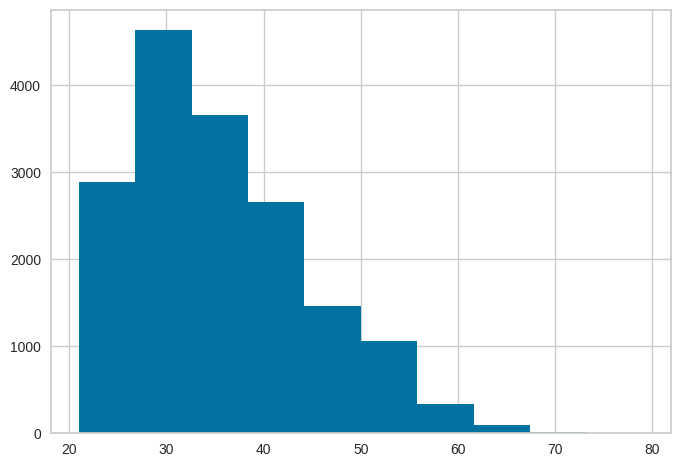

In [30]:
get_config('X_train')['AGE'].hist()

## Compare Models

In [31]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8221,0.7799,0.3796,0.6736,0.4854,0.3879,0.4113,4.0190
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.6110
ada,Ada Boost Classifier,0.8185,0.7749,0.3322,0.6848,0.4470,0.3538,0.3872,1.5000
svm,SVM - Linear Kernel,0.8130,0.7129,0.2676,0.7019,0.3867,0.3019,0.3512,0.1020
lda,Linear Discriminant Analysis,0.8129,0.7226,0.2719,0.6985,0.3910,0.3049,0.3527,0.1160
rf,Random Forest Classifier,0.8121,0.7641,0.3665,0.6299,0.4629,0.3586,0.3782,4.9910
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.4750
lr,Logistic Regression,0.8116,0.7243,0.2447,0.7180,0.3646,0.2841,0.3414,0.1230
et,Extra Trees Classifier,0.8083,0.7519,0.3651,0.6124,0.4572,0.3497,0.3671,2.4870
ridge,Ridge Classifier,0.8011,0.7224,0.1602,0.7294,0.2625,0.1987,0.2764,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [32]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [33]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8221,0.7799,0.3796,0.6736,0.4854,0.3879,0.4113,3.2410
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.6060
rf,Random Forest Classifier,0.8121,0.7641,0.3665,0.6299,0.4629,0.3586,0.3782,4.9750
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.7540
et,Extra Trees Classifier,0.8083,0.7519,0.3651,0.6124,0.4572,0.3497,0.3671,2.1990
knn,K Neighbors Classifier,0.7939,0.7014,0.3406,0.5558,0.4223,0.3056,0.3192,0.3590
dt,Decision Tree Classifier,0.7233,0.6111,0.4090,0.3828,0.3953,0.2163,0.2166,0.6590


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [34]:
compare_tree_models

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [35]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8221,0.7799,0.3796,0.6736,0.4854,0.3879,0.4113,3.241
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.606
rf,Random Forest Classifier,0.8121,0.7641,0.3665,0.6299,0.4629,0.3586,0.3782,4.975
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.754
et,Extra Trees Classifier,0.8083,0.7519,0.3651,0.6124,0.4572,0.3497,0.3671,2.199
knn,K Neighbors Classifier,0.7939,0.7014,0.3406,0.5558,0.4223,0.3056,0.3192,0.359
dt,Decision Tree Classifier,0.7233,0.6111,0.4090,0.3828,0.3953,0.2163,0.2166,0.659


In [36]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4843,0.7232,0.8385,0.2790,0.4185,0.1297,0.1958,0.0790
nb,Naive Bayes,0.7528,0.7422,0.6201,0.4580,0.5262,0.3644,0.3725,0.1210
dt,Decision Tree Classifier,0.7233,0.6111,0.4090,0.3828,0.3953,0.2163,0.2166,0.5450
lightgbm,Light Gradient Boosting Machine,0.8221,0.7799,0.3796,0.6736,0.4854,0.3879,0.4113,3.7080
gbc,Gradient Boosting Classifier,0.8215,0.7840,0.3751,0.6729,0.4813,0.3839,0.4080,6.5670
xgboost,Extreme Gradient Boosting,0.8117,0.7575,0.3724,0.6242,0.4663,0.3608,0.3786,0.4820
rf,Random Forest Classifier,0.8121,0.7641,0.3665,0.6299,0.4629,0.3586,0.3782,4.9850
et,Extra Trees Classifier,0.8083,0.7519,0.3651,0.6124,0.4572,0.3497,0.3671,2.4660
knn,K Neighbors Classifier,0.7939,0.7014,0.3406,0.5558,0.4223,0.3056,0.3192,0.3690
ada,Ada Boost Classifier,0.8185,0.7749,0.3322,0.6848,0.4470,0.3538,0.3872,1.4910


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [37]:
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 GaussianNB(priors=None, var_smoothing=1e-09),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, random_state=123, splitter='best')]

## Create Model

In [38]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [39]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7244,0.2453,0.7521,0.3699,0.2931,0.3568
1,0.8077,0.7127,0.2507,0.6739,0.3654,0.2791,0.3268
2,0.8113,0.7208,0.2372,0.7213,0.3570,0.2781,0.3376
3,0.8131,0.7320,0.2372,0.7395,0.3592,0.2822,0.3452
4,0.8107,0.7331,0.2210,0.7387,0.3402,0.2655,0.3321
5,0.8030,0.7064,0.2372,0.6471,0.3471,0.2594,0.3050
6,0.8131,0.7346,0.2769,0.6959,0.3962,0.3091,0.3552
7,0.8190,0.7488,0.2634,0.7656,0.3920,0.3143,0.3764
8,0.8155,0.7235,0.2554,0.7422,0.3800,0.3007,0.3602


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7244,0.2453,0.7521,0.3699,0.2931,0.3568
1,0.8077,0.7127,0.2507,0.6739,0.3654,0.2791,0.3268
2,0.8113,0.7208,0.2372,0.7213,0.3570,0.2781,0.3376
3,0.8131,0.7320,0.2372,0.7395,0.3592,0.2822,0.3452
4,0.8107,0.7331,0.2210,0.7387,0.3402,0.2655,0.3321
5,0.8030,0.7064,0.2372,0.6471,0.3471,0.2594,0.3050
6,0.8131,0.7346,0.2769,0.6959,0.3962,0.3091,0.3552
7,0.8190,0.7488,0.2634,0.7656,0.3920,0.3143,0.3764
8,0.8155,0.7235,0.2554,0.7422,0.3800,0.3007,0.3602


In [41]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8114,0.7212,0.2383,0.7230,0.3584,0.2795,0.3391
1,0.8079,0.7270,0.2334,0.6947,0.3495,0.2681,0.3233
2,0.8130,0.7194,0.2504,0.7226,0.3719,0.2913,0.3481
Mean,0.8108,0.7226,0.2407,0.7135,0.3599,0.2796,0.3368
Std,0.0022,0.0032,0.0071,0.0133,0.0092,0.0095,0.0102


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8167,0.7247,0.2453,0.7647,0.3714,0.2959,0.3620
1,0.8077,0.7115,0.2426,0.6818,0.3579,0.2737,0.3245
2,0.8095,0.7199,0.2264,0.7179,0.3443,0.2666,0.3279
3,0.8143,0.7316,0.2345,0.7565,0.3580,0.2831,0.3501
4,0.8107,0.7309,0.2156,0.7477,0.3347,0.2617,0.3312
5,0.8018,0.7066,0.2264,0.6462,0.3353,0.2493,0.2969
6,0.8113,0.7353,0.2608,0.6978,0.3796,0.2947,0.3446
7,0.8137,0.7495,0.2366,0.7521,0.3599,0.2841,0.3497
8,0.8125,0.7224,0.2392,0.7355,0.3611,0.2831,0.3450


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Tune Model

In [44]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7220,0.6204,0.4367,0.3857,0.4096,0.2287,0.2295
1,0.7030,0.5967,0.4070,0.3512,0.3770,0.1834,0.1843
2,0.7196,0.6064,0.4043,0.3750,0.3891,0.2075,0.2078
3,0.7423,0.6372,0.4501,0.4217,0.4355,0.2687,0.2689
4,0.7304,0.6097,0.3935,0.3904,0.3919,0.2187,0.2187
5,0.7173,0.5991,0.3881,0.3673,0.3775,0.1947,0.1949
6,0.7161,0.6089,0.4167,0.3735,0.3939,0.2092,0.2098
7,0.7238,0.6091,0.4032,0.3827,0.3927,0.2141,0.2142
8,0.7310,0.6098,0.3844,0.3907,0.3875,0.2152,0.2152


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8196,0.6457,0.3342,0.6889,0.4501,0.3574,0.3909
1,0.8101,0.6348,0.3208,0.6398,0.4273,0.3282,0.3564
2,0.8256,0.6524,0.3423,0.7216,0.4644,0.3756,0.4130
3,0.8268,0.6551,0.3477,0.7247,0.4699,0.3814,0.4182
4,0.8173,0.6316,0.2992,0.7025,0.4197,0.3315,0.3742
5,0.8137,0.6409,0.3315,0.6543,0.4401,0.3424,0.3709
6,0.8286,0.6706,0.3871,0.7059,0.5000,0.4070,0.4338
7,0.8304,0.6641,0.3656,0.7351,0.4883,0.4001,0.4352
8,0.8268,0.6541,0.3441,0.7314,0.4680,0.3802,0.4188


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [46]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [47]:
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8190,0.7521,0.3693,0.6618,0.4740,0.3752,0.3985
1,0.8143,0.7374,0.3477,0.6482,0.4526,0.3528,0.3777
2,0.8214,0.7463,0.3450,0.6919,0.4604,0.3675,0.3995
3,0.8286,0.7606,0.3989,0.6948,0.5068,0.4122,0.4354
4,0.8268,0.7561,0.3666,0.7083,0.4831,0.3915,0.4222
5,0.8095,0.7261,0.3612,0.6175,0.4558,0.3498,0.3683
6,0.8321,0.7613,0.4220,0.7009,0.5268,0.4324,0.4529
7,0.8274,0.7653,0.3602,0.7204,0.4803,0.3903,0.4240
8,0.8262,0.7520,0.3575,0.7151,0.4767,0.3861,0.4195


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [48]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8196,0.6457,0.3342,0.6889,0.4501,0.3574,0.3909
1,0.8101,0.6348,0.3208,0.6398,0.4273,0.3282,0.3564
2,0.8256,0.6524,0.3423,0.7216,0.4644,0.3756,0.4130
3,0.8268,0.6551,0.3477,0.7247,0.4699,0.3814,0.4182
4,0.8173,0.6316,0.2992,0.7025,0.4197,0.3315,0.3742
5,0.8137,0.6409,0.3315,0.6543,0.4401,0.3424,0.3709
6,0.8286,0.6706,0.3871,0.7059,0.5000,0.4070,0.4338
7,0.8304,0.6641,0.3656,0.7351,0.4883,0.4001,0.4352
8,0.8268,0.6541,0.3441,0.7314,0.4680,0.3802,0.4188


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [49]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [50]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_1',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BI...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                            

## ✅ Ensemble Model

In [51]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.7255,0.3396,0.5806,0.4286,0.3173,0.3341
1,0.7976,0.7202,0.3423,0.5695,0.4276,0.3138,0.3288
2,0.7982,0.7145,0.3046,0.5825,0.4000,0.2927,0.3150
3,0.8071,0.7518,0.3558,0.6083,0.4490,0.3417,0.3597
4,0.8101,0.7374,0.3181,0.6413,0.4252,0.3266,0.3555
5,0.7982,0.7180,0.3477,0.5708,0.4322,0.3182,0.3326
6,0.8018,0.7356,0.3763,0.5809,0.4568,0.3423,0.3543
7,0.8006,0.7273,0.3226,0.5911,0.4174,0.3094,0.3301
8,0.8065,0.7290,0.3253,0.6205,0.4268,0.3238,0.3483


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [52]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7262,0.6618,0.3774,0.3794,0.3784,0.2028,0.2028
1,0.7280,0.6455,0.3693,0.3806,0.3748,0.2010,0.2011
2,0.7458,0.6675,0.3908,0.4191,0.4045,0.2432,0.2434
3,0.7375,0.6764,0.3908,0.4028,0.3967,0.2290,0.2291
4,0.7440,0.6658,0.3666,0.4109,0.3875,0.2264,0.2269
5,0.7369,0.6745,0.4124,0.4058,0.4091,0.2399,0.2399
6,0.7488,0.6655,0.3978,0.4277,0.4123,0.2528,0.2531
7,0.7339,0.6587,0.3817,0.3955,0.3885,0.2186,0.2186
8,0.7470,0.6566,0.4005,0.4245,0.4122,0.2512,0.2513


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## ✅ Blend Models

In [55]:
# top 3 models based on recall
# best_recall_models_top3
# import numpy as np

# best_recall_models_top3 = np.array(best_recall_models_top3)
# best_recall_models_top3.setflags(write=True)
!pip install --upgrade pip
!pip install numpy==1.23.5
import numpy as np
print(np.__version__)


1.23.5


In [62]:
best_recall_models_top3 = np.array(best_recall_models_top3)
best_recall_models_top3.setflags(write=True)

In [59]:
best_recall_models_top3

array([QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                     store_covariance=False, tol=0.0001),
       GaussianNB(priors=None, var_smoothing=1e-09),
       DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                              max_depth=None, max_features=None, max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_samples_leaf=1,
                              min_samples_split=2, min_weight_fraction_leaf=0.0,
                              monotonic_cst=None, random_state=123, splitter='best') ],
      dtype=object)

In [ ]:
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9999,0.9956,0.9956,0.9956,0.9881,0.9882
1,0.9912,0.9986,0.9912,0.9912,0.9912,0.9763,0.9763
2,0.9956,0.9995,0.9956,0.9956,0.9956,0.9881,0.9882
3,0.9956,0.9997,0.9956,0.9957,0.9956,0.9882,0.9883
4,0.9978,1.0000,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9934,0.9990,0.9934,0.9934,0.9934,0.9822,0.9822
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9934,0.9997,0.9934,0.9934,0.9934,0.9821,0.9821
8,0.9956,0.9938,0.9956,0.9956,0.9956,0.9881,0.9881


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## ✅ Stack Models

In [ ]:
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9999,0.9956,0.9956,0.9956,0.9881,0.9882
1,0.9934,0.9986,0.9934,0.9934,0.9934,0.9822,0.9822
2,0.9956,0.9995,0.9956,0.9956,0.9956,0.9881,0.9882
3,0.9978,0.9996,0.9978,0.9978,0.9978,0.9941,0.9941
4,0.9978,1.0000,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9934,0.9990,0.9934,0.9934,0.9934,0.9822,0.9822
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9956,0.9997,0.9956,0.9956,0.9956,0.9880,0.9881
8,0.9956,0.9938,0.9956,0.9956,0.9956,0.9881,0.9881


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_...
                                               subsample_for_bin=200000,
                                               subsample_freq=0))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## ✅ Plot Model

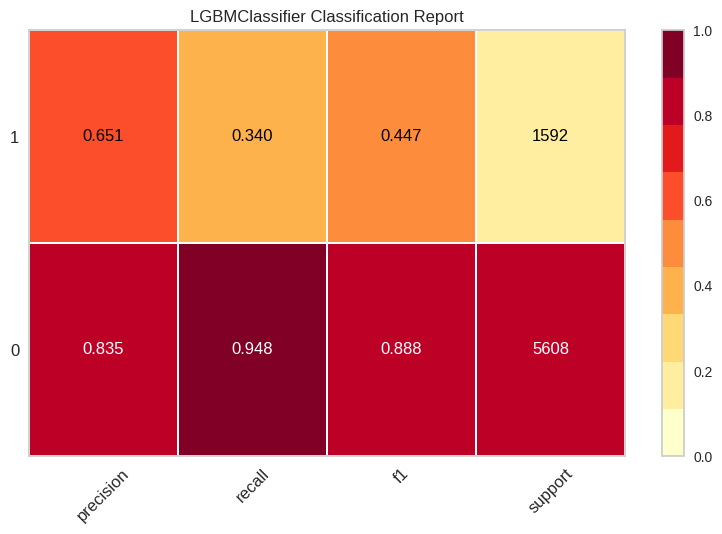

In [74]:
# plot class report
plot_model(best, plot = 'class_report')

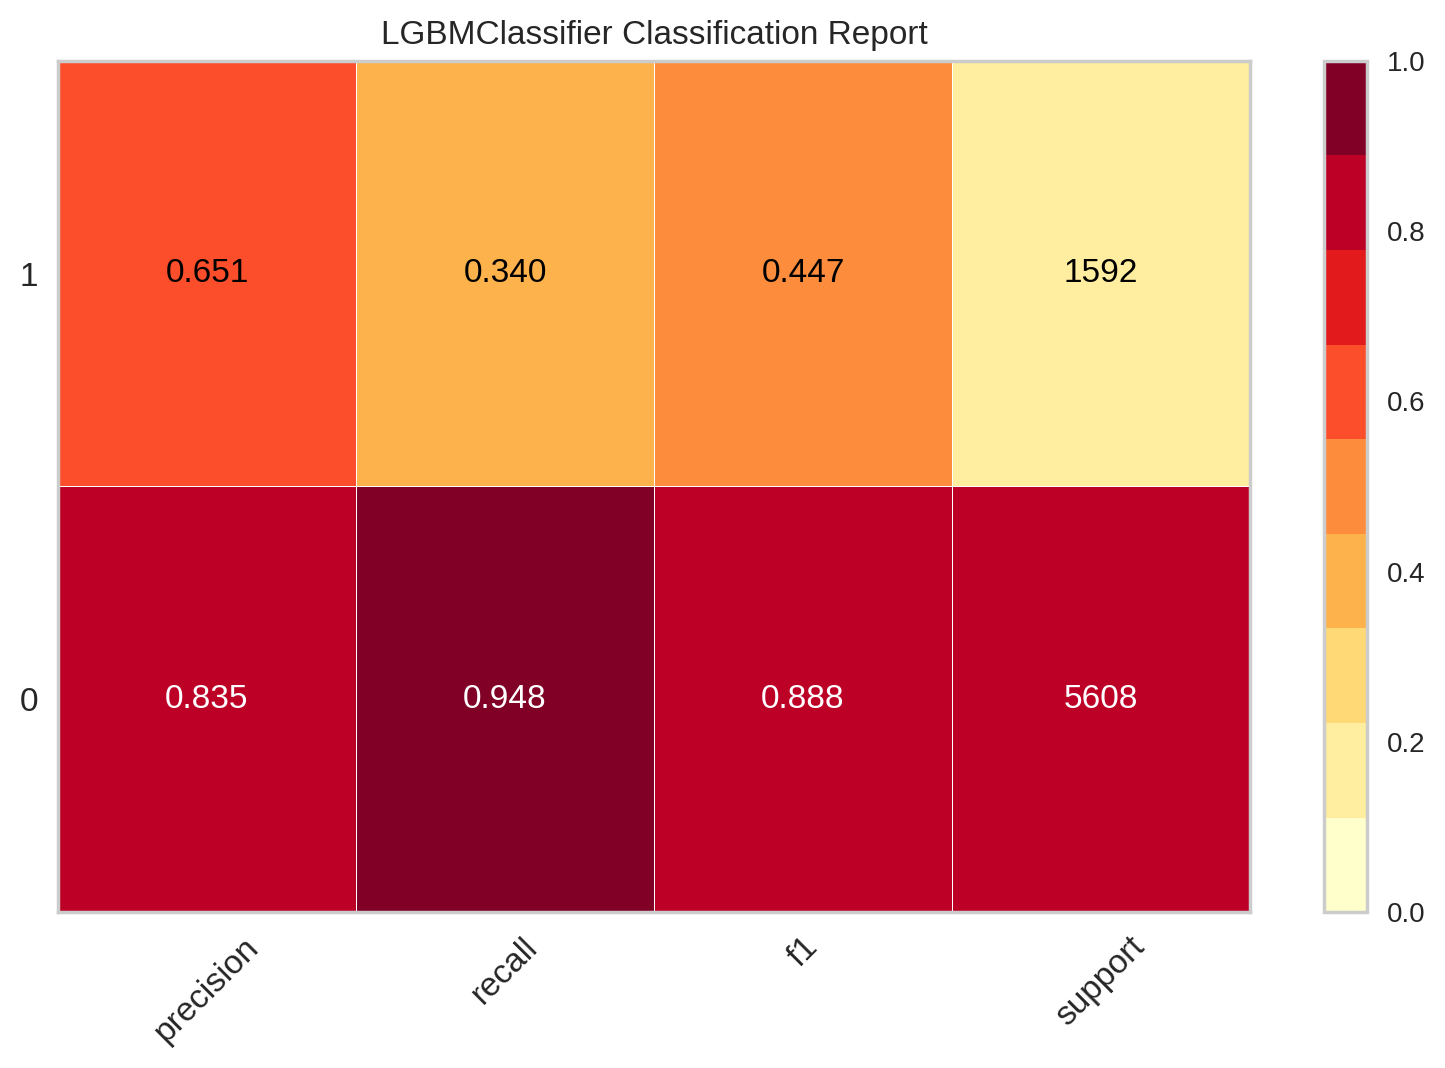

In [75]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [76]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## ✅ Interpret Model

In [77]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8262,0.7810,0.3854,0.6908,0.4948,0.3999,0.4247
1,0.8125,0.7750,0.3612,0.6321,0.4597,0.3563,0.3768
2,0.8226,0.7612,0.3827,0.6730,0.4880,0.3904,0.4131
3,0.8268,0.7943,0.4043,0.6818,0.5076,0.4107,0.4314
4,0.8286,0.7765,0.3827,0.7065,0.4965,0.4040,0.4316
5,0.8113,0.7769,0.3612,0.6262,0.4581,0.3537,0.3733
6,0.8268,0.7758,0.4086,0.6816,0.5109,0.4136,0.4336
7,0.8292,0.7838,0.3978,0.7014,0.5077,0.4138,0.4381
8,0.8274,0.7942,0.3737,0.7092,0.4894,0.3973,0.4269


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## ✅ Get Leaderboard

In [78]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/52 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.8116,0.7243,0.2447,0.7180,0.3646,0.2841,0.3414
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7939,0.7014,0.3406,0.5558,0.4223,0.3056,0.3192
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.7528,0.7422,0.6201,0.4580,0.5262,0.3644,0.3725
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7233,0.6111,0.4090,0.3828,0.3953,0.2163,0.2166
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.8130,0.7129,0.2676,0.7019,0.3867,0.3019,0.3512
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8011,0.7224,0.1602,0.7294,0.2625,0.1987,0.2764
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8121,0.7641,0.3665,0.6299,0.4629,0.3586,0.3782
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.4843,0.7232,0.8385,0.2790,0.4185,0.1297,0.1958
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8185,0.7749,0.3322,0.6848,0.4470,0.3538,0.3872


In [79]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09)]],
         verbose=False)

## AutoML

In [80]:
automl()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Create App

In [81]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://151e30c4448e9cb80c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Create API

In [82]:
# create api
create_api(best, api_name = 'credit_classification_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python credit_classification_api.py


## Create Docker

In [83]:
create_docker('credit_classification_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## Finalize Model

In [84]:
final_best = finalize_model(best)

In [85]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'],
                                    transform...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

## Convert Model

In [86]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[5] <= 0.3500000089406967) {
            if (input[6] <= 0.3888888955116272) {
                if (input[19] <= 0.0013350280933082104) {
                    if (input[11] <= 0.18205950409173965) {
                        if (input[4] <= 0.42241379618644714) {
                            if (input[19] <= 0.0000009838084906732547) {
                                if (input[9] <= 0.30000000447034836) {
                                    if (input[5] <= 0.05000000074505806) {
                                        if (input[0] <= 0.2848101258277893) {
                                            if (input[0] <= 0.12025316432118416) {
                                                if (input[0] <= 0.01898734224960208) {
                                                    if (input[4] <= 0.27586206793785095) {
                                                        var0 = new dou

## Save / Load Model

In [87]:
# save model
save_model(best, 'credit_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AMT4', 'PAY_AMT5',
                                              'PAY_AMT6'],
                                     transform...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='spl

In [88]:
# load model
loaded_from_disk = load_model('credit_classification_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AMT4', 'PAY_AMT5',
                                             'PAY_AMT6'...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

## Save / Load Experiment

In [89]:
# save experiment
save_experiment('credit_experiment')

In [90]:
# load experiment from disk
exp_from_disk = load_experiment('credit_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(24000, 24)"
4,Transformed data shape,"(24000, 24)"
5,Transformed train set shape,"(16800, 24)"
6,Transformed test set shape,"(7200, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple
